###### 특정 기간 혹은 날에 대한 영화 평점 그래프 그리기
* pd.date_range() 변경하기
* pivot_table()과 query() 이용하기

# 201600282 엄기산

## 영화 평점 데이터 가져오기

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

import time

days = 50
date_list = pd.date_range('2020-01-03', periods=days, freq='D')

movie_title = []
movie_point = []
movie_date = []

for today in tqdm(date_list):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=" + (today.strftime('%Y%m%d'))
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(), "html.parser")
    
        time.sleep(3)

        titles = soup.find_all('em', {'class': 'tit5'})
        points = soup.find_all('', {'class': 'point'})

        titles_text = []
        points_text = []
        date = []
        for t, p in zip(titles, points):
            titles_text.append(t.text.strip(' \n'))
            points_text.append(float(p.text))
            date.append(today)

    movie_title += titles_text
    movie_point += points_text
    movie_date += date
    
# print(movie_point)

  0%|          | 0/50 [00:00<?, ?it/s]

## DataFrame으로 만들기

In [2]:
import pandas as pd

frame = pd.DataFrame({'date': movie_date, 'title': movie_title, 'point': movie_point})
frame

,date,title,point
0,2020-01-03,그린 북,9.61
1,2020-01-03,가버나움,9.59
2,2020-01-03,포드 V 페라리,9.56
3,2020-01-03,베일리 어게인,9.53
4,2020-01-03,주전장,9.53
...,...,...,...
2495,2020-02-21,굿 윌 헌팅,9.35
2496,2020-02-21,히든 피겨스,9.35
2497,2020-02-21,세 얼간이,9.35
2498,2020-02-21,달링,9.35


## pivot_table() 이용하기

In [3]:
import numpy as np

movie_point_frame = pd.pivot_table(frame, values=['point'], index=['title'], aggfunc=np.mean)
movie_point_frame_sort = movie_point_frame.sort_values(by='point', ascending=False)
movie_point_frame_sort.head(10)

,point
title,
그린 북,9.6090
가버나움,9.5900
포드 V 페라리,9.5308
베일리 어게인,9.5300
주전장,9.5186
아일라,9.4914
원더,9.4778
당갈,9.4600
쇼생크 탈출,9.4334


## 그래프 그리기 1. 상위 10개의 영화 점수 평균 그리기

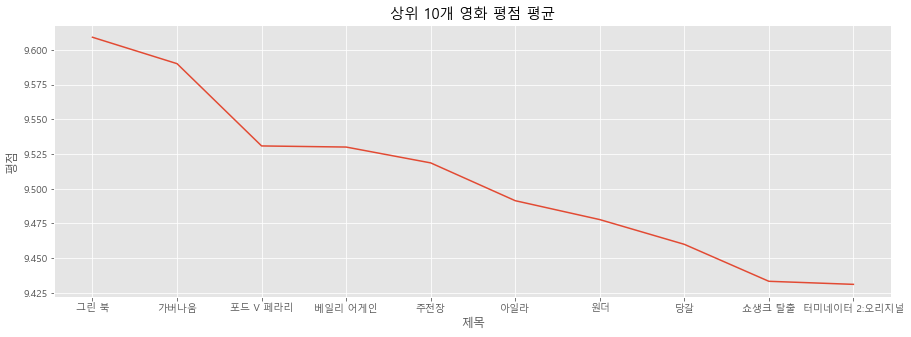

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

plt.figure(figsize=(15,5))
plt.plot(movie_point_frame_sort[:10]['point'])
plt.title('상위 10개 영화 평점 평균')
plt.xlabel('제목')
plt.ylabel('평점')
plt.show()

## query() 이용하기

In [5]:
input_title = input()
search_movie = frame.query("title == ['{}']".format(input_title))

쇼생크 탈출


## 그래프 그리기 2. 특정 영화 평점 추이 살펴보기

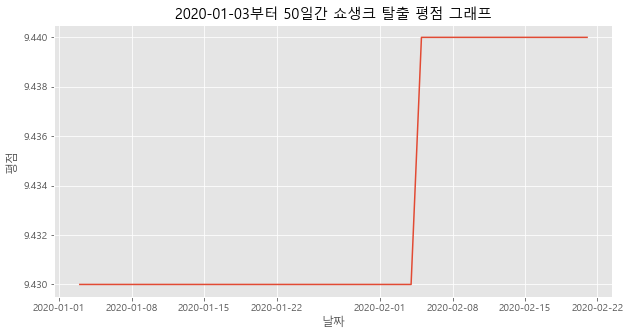

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

plt.figure(figsize=(10,5))
plt.plot(search_movie['date'], search_movie['point'])
plt.title('2020-01-03부터 {}일간 {} 평점 그래프'.format(days, input_title))
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()